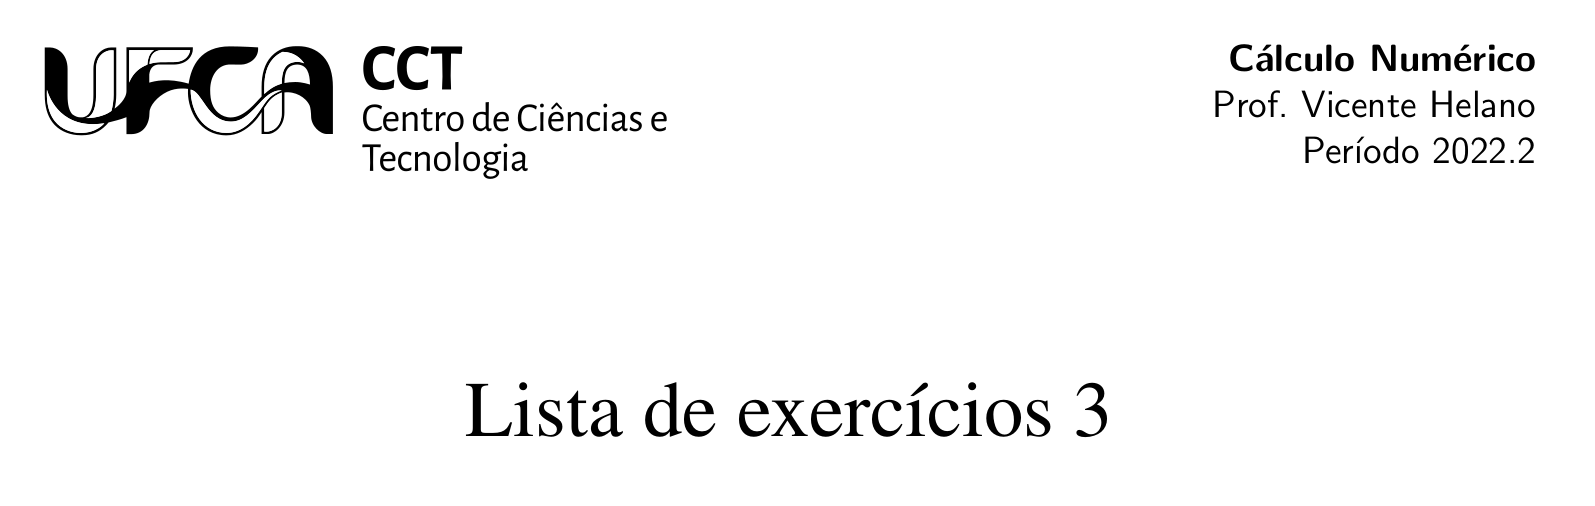

### **Nome:** _(digite aqui seu nome)_

### Questão 15.

O gerente de um posto de combustíveis está desconfiado de que a régua de medição de volume de seu fornecedor está desregulada.
Segundo o gerente, os combustíveis são armazenados em tanques cilíndricos ``deitados''.
O sistema utilizado no posto informa quando é necessário solicitar mais combustível baseado no volume de combustível vendido.
A cada reabastecimento, o motorista do caminhão fornecedor insere uma régua de medição para aferir quanto foi despejado.
Essa régua relaciona o comprimento da porção submersa da régua com o volume correspondente.
O gerente procurou você para verificar a última  medição realizada, na qual a régua
mostrava $16{,}13$ m$^3$ correspondendo a uma altura de $1{,}3$ metros.

Empregando conceitos de integração, o volume $V$ de combustível referente a uma altura submersa $h$ é dado por:

$$
V(h) = L \left[  \frac{\pi r^2}{2} - r^2 \arcsin\left( \frac{r-h}{r}\right) + \left(h-r\right)\sqrt{r^2 - \left(h-r\right)^2}  \right],
$$

onde $r$ e $L$ são o raio da base e o comprimento do cilindro, respectivamente.

(a) Implemente a função $V$ em Python, usando o bloco de notas em anexo.

In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
def plota(F, a, b, fixo=False):

    fig, ax = plt.subplots()
    ax.set_ylabel('f(x)')
    ax.set_xlabel('x')
    ax.grid()

    plt.axhline(0, color='black', linewidth=1)

    x = np.linspace(a,b,100)
    i = 0

    for f in F:
        y = f(x)
        if (fixo):
            ax.plot(x,y,label='g'+str(i))
        else:
            ax.plot(x,y)
        i = i + 1

    if (fixo):
        ax.plot(x,x)
        plt.legend()
    
    plt.xlim([a, b])

    if (fixo):
        plt.ylim([a, b])
    
    plt.show()

In [134]:
def V(h):
    r = 1
    L = 7
    v = 16.13

    return L * ( ((np.pi * r **2 )/ 2) - r**2 * np.arcsin((r -h)/r) + (h - r) * np.sqrt(r**2 - (h - r)**2))
    

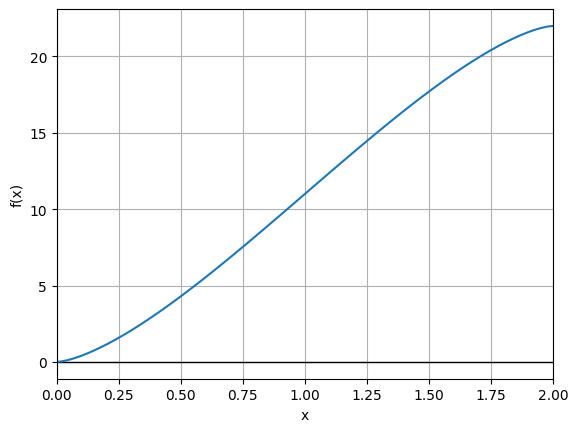

In [135]:

plota([V], 0, 2, False)

(b) Sabendo que $r = 1$ m e $L = 7$ m, o que você diria das suspeitas do gerente? Elas são procedentes? Porque? 

Sim, pois V(h), para h = 1.3, retorna um valor inferior ao dado pela régua medidora.

In [136]:
# digite seus cálculos aqui

#Para h = 1.3

print("Valor do volume para 1.3 M de profundidade: ", V(1.3))




Valor do volume para 1.3 M de profundidade:  15.131695188647646


(c) O gerente aproveitou também para lhe pedir uma orientação quanto ao momento certo para solicitar o reabastecimento de seus tanques. Geralmente, ele solicita mais combustível  à distribuidora quando um tanque possui 1/3 ou menos de sua capacidade total ocupada.
Utilize os conceitos vistos até então para resolver este problema com precisão de $10^{-2}$ metros.

*Dado a função V(h), vemos que h está no intervalo [1, 2], para as dimenções dadas para o tanque*

*Visto que a derivada de V(h) é:*

In [137]:
def dV(h):
    return -(14*(h-2)*h)/(np.sqrt(-(h-2)*h))

*Para todo h definido em [0, 2], V'(h) > 0*

Ou seja, V(h) é uma função estritamente crescente:

Assim o valor mínimo de V é para h = 0 e o valor máximo é para h = 2

Assim a capacidade máxima do tanque é:

In [138]:
print("Capacidade máxima do tanque:", V(2.0))

Capacidade máxima do tanque: 21.991148575128552


E um terço da sua capacidade será V(2.0)/3

In [139]:
third = V(2.0)/3.0

print("1/3 da capacidade total: ", third)

1/3 da capacidade total:  7.330382858376184


Como temos V(h) e V'(h), podemos utilizar o método de newton para fazer um aproximação por zero de função.

Encontrando os valores de h que aproximem o volume ao valor "third"

Passo 1:

Tranformando V(h), em uma f(x) = 0


$$
V(h) = L \left[  \frac{\pi r^2}{2} - r^2 \arcsin\left( \frac{r-h}{r}\right) + \left(h-r\right)\sqrt{r^2 - \left(h-r\right)^2}  \right],
$$

Removendo V(h) de ambos os lados temos:

$$
0 = L \left[  \frac{\pi r^2}{2} - r^2 \arcsin\left( \frac{r-h}{r}\right) + \left(h-r\right)\sqrt{r^2 - \left(h-r\right)^2}  \right] - V(h),
$$


A derivada de f(x) será a mesma de V(h), já descrita anteriormente como dV(h).


In [140]:
def f(h):
    r = 1
    L = 7
    v = third

    return L * ( ((np.pi * r **2 )/ 2) - r**2 * np.arcsin((r -h)/r) + (h - r) * np.sqrt(r**2 - (h - r)**2)) - v
    

In [141]:
def newton(f,df,p0,tol,N,tabela=False):
    # Imprime cabeçalho da tabela, caso desejado
    if (tabela):
        print(f"{'i':11s} {'p0':^12s} {'p':^12s} {'|p - p0|':^12s}")
        
    i = 1
    while i <= N:
        p = p0 - f(p0)/df(p0)
        
        # Imprime os dados da iteração
        if (tabela):
            print(f"{i:^11d} {p0:+.5e} {p:+.5e} {abs(p - p0):+.5e}")
            
        err = tol*max(1.0, abs(p))
        if abs(p - p0) < err:
            break
        i = i + 1
        p0 = p
        
    if i > N:
        print("Número máximo de iterações atingido!")
        i = i - 1
        
    return i,p

In [142]:

a = newton(f, dV, 0.5, 1e-2, 100, True)
a

i                p0           p         |p - p0|  
     1      +5.00000e-01 +7.50000e-01 +2.50000e-01
     2      +7.50000e-01 +7.35098e-01 +1.49017e-02
     3      +7.35098e-01 +7.35068e-01 +3.03621e-05


(3, 0.7350679155285451)

** FINALIZANDO **

In [143]:
def solicitar(h):
    if (h <= a[1]):
        return print("Nível de combustível abaixo do limite mínimo")
    else:
        return print("Nível de combustível acima do limite mínimo")
    
##Testes

print("Para h = 1.3")
solicitar(1.3)

print("Para h = 0.4")
solicitar(0.4)


Para h = 1.3
Nível de combustível acima do limite mínimo
Para h = 0.4
Nível de combustível abaixo do limite mínimo
